<a href="https://colab.research.google.com/github/SNEHILPANDEY15/FDA-assignment-/blob/main/Snehil_Report_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
#Loading dataset
url = "https://raw.githubusercontent.com/SNEHILPANDEY15/FDA-assignment-/main/Bank%20Customer%20Churn%20Prediction.csv"
df = pd.read_csv(url)

print(df.head().to_string(index=False))

 customer_id  credit_score country gender  age  tenure   balance  products_number  credit_card  active_member  estimated_salary  churn
    15634602           619  France Female   42       2      0.00                1            1              1         101348.88      1
    15647311           608   Spain Female   41       1  83807.86                1            0              1         112542.58      0
    15619304           502  France Female   42       8 159660.80                3            1              0         113931.57      1
    15701354           699  France Female   39       1      0.00                2            0              0          93826.63      0
    15737888           850   Spain Female   43       2 125510.82                1            1              1          79084.10      0


In [171]:
#Data values
df.columns = [c.strip().lower() for c in df.columns]

print("Missing values per column:")
print(df.isnull().sum())
print("\nDuplicate rows:")
print(df.duplicated().sum())

print("\nTarget distribution (churn):")
print(df["churn"].value_counts())

print("\nTarget distribution (churn) - percentages:")
print((df["churn"].value_counts(normalize=True) * 100).round(1).astype(str) + "%")

Missing values per column:
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Duplicate rows:
0

Target distribution (churn):
churn
0    7963
1    2037
Name: count, dtype: int64

Target distribution (churn) - percentages:
churn
0    79.6%
1    20.4%
Name: proportion, dtype: object


In [172]:
#Data cleaning
df = df.drop(columns=["customer_id"], errors="ignore")
df["churn"] = df["churn"].astype(int)

cat_cols = ["country", "gender"]
num_cols = [c for c in df.columns if c not in cat_cols + ["churn"]]

print("Missing values (total):", int(df.isnull().sum().sum()))
print("Duplicate rows:", int(df.duplicated().sum()))

churn_counts = df["churn"].value_counts().sort_index()
churn_counts.index.name = None
churn_counts.name = None
print("Churn counts:\n" + churn_counts.to_string())

print(df.head().to_string(index=False))

Missing values (total): 0
Duplicate rows: 0
Churn counts:
0    7963
1    2037
 credit_score country gender  age  tenure   balance  products_number  credit_card  active_member  estimated_salary  churn
          619  France Female   42       2      0.00                1            1              1         101348.88      1
          608   Spain Female   41       1  83807.86                1            0              1         112542.58      0
          502  France Female   42       8 159660.80                3            1              0         113931.57      1
          699  France Female   39       1      0.00                2            0              0          93826.63      0
          850   Spain Female   43       2 125510.82                1            1              1          79084.10      0


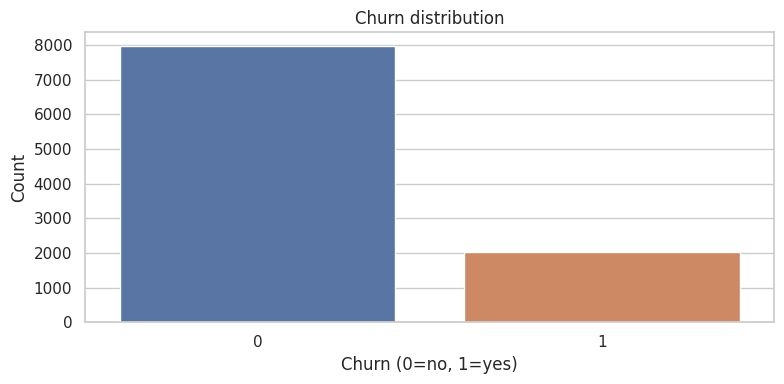

In [173]:
#Churn distribution
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

ax = sns.countplot(data=df, x="churn", hue="churn", palette=["#4C72B0", "#DD8452"], legend=False)
ax.set_title("Churn distribution")
ax.set_xlabel("Churn (0=no, 1=yes)")
ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

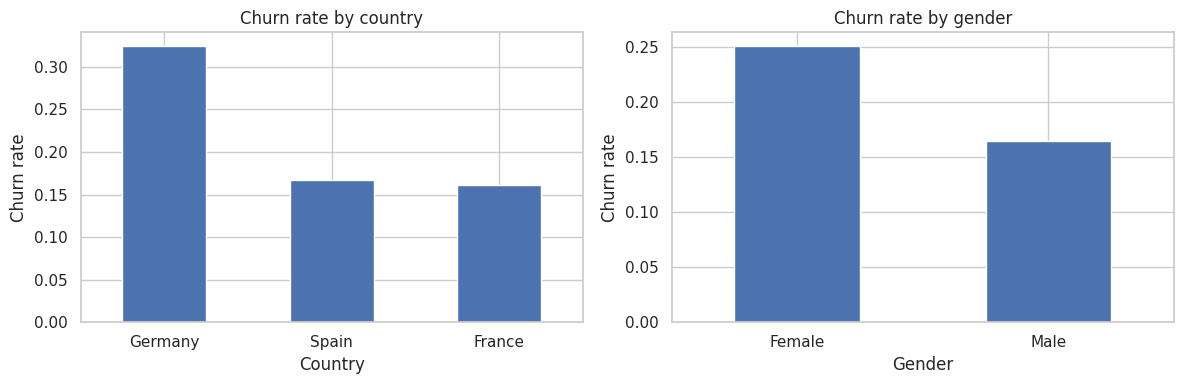

In [174]:
#Churn rate by country + gender
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

(df.groupby("country")["churn"].mean().sort_values(ascending=False)).plot(kind="bar", ax=ax[0])
ax[0].set_title("Churn rate by country")
ax[0].set_xlabel("Country")
ax[0].set_ylabel("Churn rate")
ax[0].tick_params(axis="x", rotation=0)

(df.groupby("gender")["churn"].mean().sort_values(ascending=False)).plot(kind="bar", ax=ax[1])
ax[1].set_title("Churn rate by gender")
ax[1].set_xlabel("Gender")
ax[1].set_ylabel("Churn rate")
ax[1].tick_params(axis="x", rotation=0)

plt.tight_layout()
plt.show()

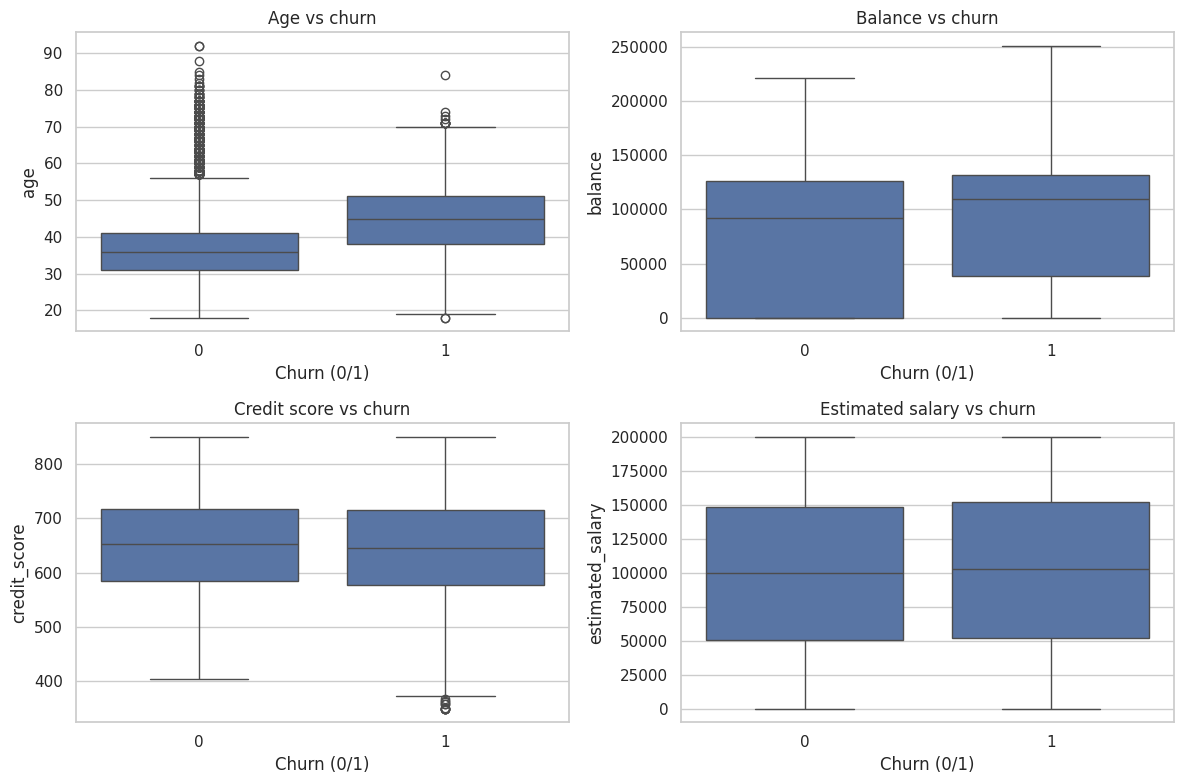

In [175]:
#Key boxplots vs churn
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(data=df, x="churn", y="age", ax=ax[0, 0])
ax[0, 0].set_title("Age vs churn")

sns.boxplot(data=df, x="churn", y="balance", ax=ax[0, 1])
ax[0, 1].set_title("Balance vs churn")

sns.boxplot(data=df, x="churn", y="credit_score", ax=ax[1, 0])
ax[1, 0].set_title("Credit score vs churn")

sns.boxplot(data=df, x="churn", y="estimated_salary", ax=ax[1, 1])
ax[1, 1].set_title("Estimated salary vs churn")

for a in ax.ravel():
    a.set_xlabel("Churn (0/1)")
plt.tight_layout()
plt.show()

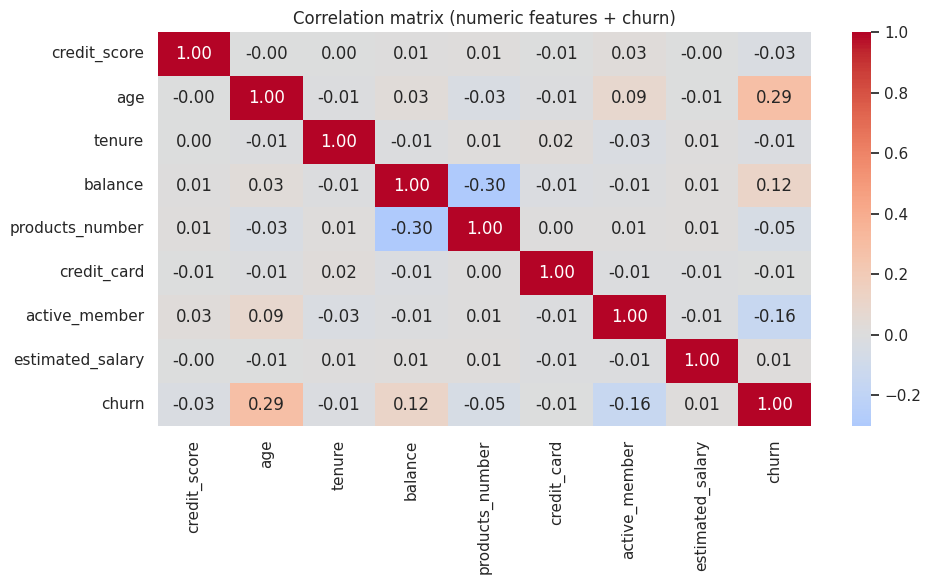

In [176]:
#Correlation heatmap
plt.figure(figsize=(10, 6))
corr = df[num_cols + ["churn"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation matrix (numeric features + churn)")
plt.tight_layout()
plt.show()

In [177]:
#Train/test split + preprocessing pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

X = df.drop(columns=["churn"])
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)

print("\nChurn ratio (full):")
print(y.value_counts(normalize=True).round(3).to_string())

print("\nChurn ratio (train):")
print(y_train.value_counts(normalize=True).round(3).to_string())

print("\nChurn ratio (test):")
print(y_test.value_counts(normalize=True).round(3).to_string())

try:
    ohe = OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(drop="first", handle_unknown="ignore", sparse=False)

prep = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", ohe, cat_cols)
    ],
    remainder="drop"
)

X_train_prep = prep.fit_transform(X_train)
X_test_prep  = prep.transform(X_test)

print("\nAfter preprocessing:")
print("X_train_prep shape:", X_train_prep.shape)
print("X_test_prep shape :", X_test_prep.shape)

Train size: (8000, 10)  Test size: (2000, 10)

Churn ratio (full):
churn
0    0.796
1    0.204

Churn ratio (train):
churn
0    0.796
1    0.204

Churn ratio (test):
churn
0    0.796
1    0.204

After preprocessing:
X_train_prep shape: (8000, 11)
X_test_prep shape : (2000, 11)


In [178]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score
)

lr_clf = Pipeline(steps=[
    ("prep", prep),
    ("model", LogisticRegression(max_iter=1000, random_state=42))
])

lr_clf.fit(X_train, y_train)

y_pred = lr_clf.predict(X_test)
y_prob = lr_clf.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1  = f1_score(y_test, y_pred, zero_division=0)
auc = roc_auc_score(y_test, y_prob)

clf_metrics = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"],
    "Value":  [acc, pre, rec, f1, auc]
}).round(4)
print(clf_metrics.to_string(index=False))

   Metric  Value
 Accuracy 0.8080
Precision 0.5891
   Recall 0.1867
 F1-score 0.2836
  ROC-AUC 0.7748


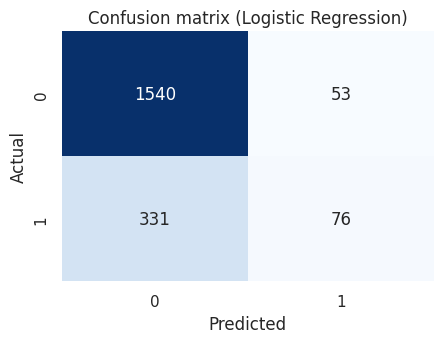

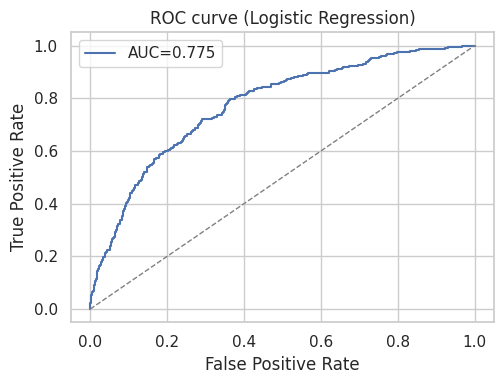

In [179]:
#Confusion matrix and ROC curve (LR)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4.6, 3.6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

print("\n" * 2)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(5.2, 4))
plt.plot(fpr, tpr, label=f"AUC={auc:.3f}")
plt.plot([0, 1], [0, 1], "--", color="grey", linewidth=1)
plt.title("ROC curve (Logistic Regression)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

In [180]:
#Related regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_prob))
mae  = mean_absolute_error(y_test, y_prob)
r2   = r2_score(y_test, y_prob)

reg_metrics = pd.DataFrame({
    "Metric": ["RMSE", "MAE", "R²"],
    "Value":  [rmse, mae, r2]
}).round(4)

print(reg_metrics.to_string(index=False))

Metric  Value
  RMSE 0.3671
   MAE 0.2717
    R² 0.1684


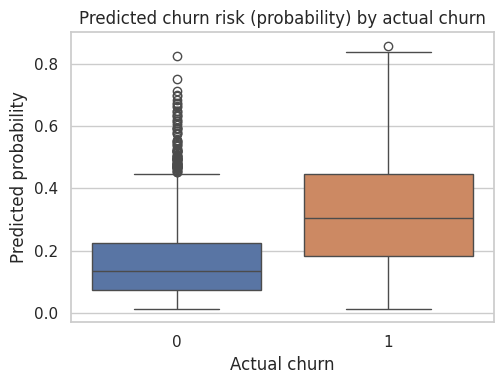

In [181]:
#Risk score distribution by true class
tmp = pd.DataFrame({"actual_churn": y_test.values, "risk_score": y_prob})
plt.figure(figsize=(5.2, 4))
sns.boxplot(
    data=tmp,
    x="actual_churn",
    y="risk_score",
    hue="actual_churn",
    palette=["#4C72B0", "#DD8452"],
    legend=False                \
)

plt.title("Predicted churn risk (probability) by actual churn")
plt.xlabel("Actual churn")
plt.ylabel("Predicted probability")
plt.tight_layout()
plt.show()

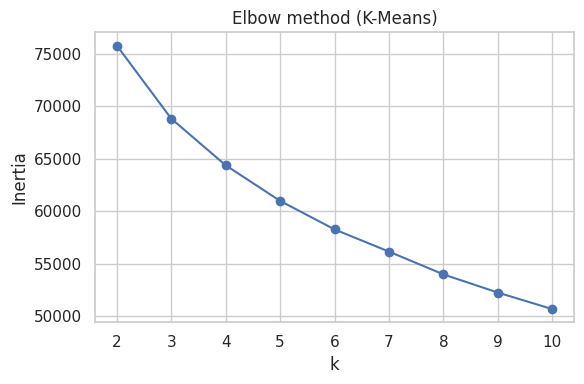

 cluster  count  churn_rate
       0   2899        19.9
       1   2436        32.1
       2   2183        13.4
       3   2482        15.5


In [182]:
#K-Means segmentation
from sklearn.cluster import KMeans

X_all_prep = prep.fit_transform(X)

inertias = []
k_values = range(2, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_all_prep)
    inertias.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(list(k_values), inertias, marker="o")
plt.title("Elbow method (K-Means)")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.tight_layout()
plt.show()

k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_all_prep)

df_seg = df.copy()
df_seg["cluster"] = clusters

cluster_summary = (
    df_seg.groupby("cluster")["churn"]
    .agg(count="size", churn_rate="mean")
    .reset_index()
)

cluster_summary["churn_rate"] = (cluster_summary["churn_rate"] * 100).round(1)

print(cluster_summary.to_string(index=False))

 cluster  customers  churn_rate  avg_age  avg_balance  avg_products  active_rate
       1       2436        32.1     38.6     103834.0          1.26          0.0
       0       2899        19.9     39.1      78716.0          1.50         52.5
       3       2482        15.5     39.8     105466.0          1.29        100.0
       2       2183        13.4     38.1      10057.0          2.15         52.6





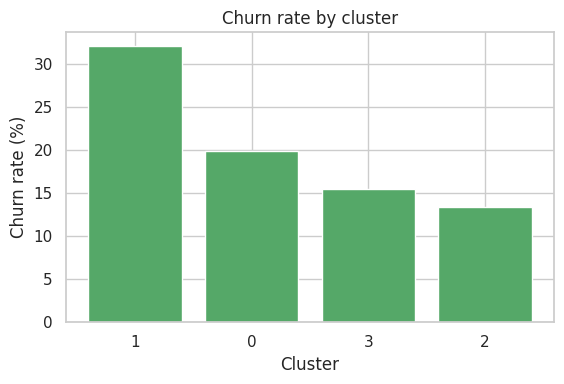

In [183]:
#Cluster profiling + churn rate by cluster

cluster_profile = (
    df_seg.groupby("cluster")
    .agg(
        customers=("cluster", "size"),
        churn_rate=("churn", "mean"),
        avg_age=("age", "mean"),
        avg_balance=("balance", "mean"),
        avg_products=("products_number", "mean"),
        active_rate=("active_member", "mean")
    )
    .reset_index()
)

cluster_profile["churn_rate"]  = (cluster_profile["churn_rate"] * 100).round(1)
cluster_profile["active_rate"] = (cluster_profile["active_rate"] * 100).round(1)
cluster_profile = cluster_profile.round({"avg_age": 1, "avg_balance": 0, "avg_products": 2})
cluster_profile = cluster_profile.sort_values("churn_rate", ascending=False).reset_index(drop=True)

print(cluster_profile.to_string(index=False))
print("\n" * 2)

plt.figure(figsize=(5.8, 4))
plt.bar(cluster_profile["cluster"].astype(str), cluster_profile["churn_rate"], color="#55A868")
plt.title("Churn rate by cluster")
plt.xlabel("Cluster")
plt.ylabel("Churn rate (%)")
plt.tight_layout()
plt.show()

In [184]:
# LR coefficients table (rebuild + print)
ohe_fitted = lr_clf.named_steps["prep"].named_transformers_["cat"]
cat_names = ohe_fitted.get_feature_names_out(cat_cols)

feature_names = list(num_cols) + list(cat_names)
coef_vals = lr_clf.named_steps["model"].coef_.ravel()

final_coef_table = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coef_vals
})
#coef table
final_coef_table["Feature"] = (
    final_coef_table["Feature"]
      .str.replace("country_", "Country: ", regex=False)
      .str.replace("gender_", "Gender: ", regex=False)
      .str.replace("_", " ", regex=False)
)
t = final_coef_table.copy()
t["Coefficient"] = t["Coefficient"].round(3)
pos = t[t["Coefficient"] > 0].sort_values("Coefficient", ascending=False)
neg = t[t["Coefficient"] < 0].sort_values("Coefficient", ascending=True)

print("Top factors increasing churn risk:")
print(pos[["Feature", "Coefficient"]].head(6).to_string(index=False, justify="left", col_space=[26, 12]))
print("\nTop factors reducing churn risk:")
print(neg[["Feature", "Coefficient"]].head(6).to_string(index=False, justify="left", col_space=[26, 12]))

Top factors increasing churn risk:
Feature                     Coefficient
Country: Germany           0.820       
             age           0.739       
         balance           0.162       
estimated salary           0.048       
  Country: Spain           0.044       

Top factors reducing churn risk:
Feature                     Coefficient
   Gender: Male            -0.522      
  active member            -0.516      
   credit score            -0.086      
products number            -0.071      
    credit card            -0.032      
         tenure            -0.020      
